## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: PPGEE0023 - Attribute Extraction

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---



## - AttributeExtraction - Features Extraction (ResNet50) and Classification:




---



## Importing the Libraries:

---

In [ ]:
!pip install seaborn opencv-python Pillow

import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

100%|██████████| 964M/964M [00:17<00:00, 58.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/11


O código começa instalando bibliotecas necessárias para processamento de dados e imagens. Em seguida, utiliza o módulo kagglehub para baixar a versão mais recente do dataset "moltean/fruits" e exibe o caminho onde os arquivos estão armazenados. Importa várias bibliotecas como numpy, pandas, matplotlib, seaborn, tensorflow, cv2 e Pillow para manipulação de dados, visualização e processamento de imagens. Além disso, carrega ferramentas específicas para pré-processamento de imagens, como preprocess_input e img_to_array, usadas em modelos de aprendizado profundo.

## Main Code - Load Images:
---



In [ ]:
import os

# Diretório do dataset
dataset_path = "/root/.cache/kagglehub/datasets/moltean/fruits/versions/11"

# Listar os arquivos
print("Arquivos no dataset:")
for root, dirs, files in os.walk(dataset_path):
    print(root)
    for file in files:
        print(f"  {file}")

Streaming output truncated to the last 5000 lines.
  r_21_100.jpg
  r2_73_100.jpg
  101_100.jpg
  r2_81_100.jpg
  91_100.jpg
  r2_191_100.jpg
  r2_182_100.jpg
  52_100.jpg
  79_100.jpg
  r_17_100.jpg
  r_111_100.jpg
  46_100.jpg
  76_100.jpg
  80_100.jpg
  r2_177_100.jpg
  r_110_100.jpg
  r_29_100.jpg
  r_9_100.jpg
  r_123_100.jpg
  82_100.jpg
  63_100.jpg
  r2_193_100.jpg
  102_100.jpg
  r2_79_100.jpg
  r2_183_100.jpg
  r2_72_100.jpg
  118_100.jpg
  r2_178_100.jpg
  r2_197_100.jpg
  71_100.jpg
  107_100.jpg
  65_100.jpg
  74_100.jpg
  r2_185_100.jpg
  r2_76_100.jpg
  r_19_100.jpg
  95_100.jpg
  r_119_100.jpg
  r2_190_100.jpg
  r_10_100.jpg
  r2_75_100.jpg
  77_100.jpg
  r_4_100.jpg
  r2_200_100.jpg
  r_108_100.jpg
  78_100.jpg
  83_100.jpg
  r2_176_100.jpg
  r_13_100.jpg
  r_28_100.jpg
  50_100.jpg
  r_122_100.jpg
  r2_198_100.jpg
  117_100.jpg
  116_100.jpg
  r2_179_100.jpg
  r_126_100.jpg
  112_100.jpg
  r_112_100.jpg
  r2_187_100.jpg
  r2_80_100.jpg
  r2_169_100.jpg
  r2_188_100.jp

O código define o caminho para um diretório que contém um dataset. Em seguida, utiliza a função os.walk() para percorrer recursivamente esse diretório, listando todos os arquivos e subdiretórios encontrados. Ele imprime o nome de cada diretório e os arquivos contidos nele, permitindo visualizar a estrutura do dataset.

In [ ]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/moltean/fruits/versions/11'

print("Arquivos e diretórios no caminho do dataset:")
for root, dirs, files in os.walk(dataset_path):
    print(f"Diretório: {root}")
    for dir_name in dirs:
        print(f"  Subdiretório: {dir_name}")
    for file_name in files:
        print(f"  Arquivo: {file_name}")

train_dir = '/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training'
test_dir = '/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Test'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
)

Streaming output truncated to the last 5000 lines.
  Arquivo: 91_100.jpg
  Arquivo: r2_191_100.jpg
  Arquivo: r2_182_100.jpg
  Arquivo: 52_100.jpg
  Arquivo: 79_100.jpg
  Arquivo: r_17_100.jpg
  Arquivo: r_111_100.jpg
  Arquivo: 46_100.jpg
  Arquivo: 76_100.jpg
  Arquivo: 80_100.jpg
  Arquivo: r2_177_100.jpg
  Arquivo: r_110_100.jpg
  Arquivo: r_29_100.jpg
  Arquivo: r_9_100.jpg
  Arquivo: r_123_100.jpg
  Arquivo: 82_100.jpg
  Arquivo: 63_100.jpg
  Arquivo: r2_193_100.jpg
  Arquivo: 102_100.jpg
  Arquivo: r2_79_100.jpg
  Arquivo: r2_183_100.jpg
  Arquivo: r2_72_100.jpg
  Arquivo: 118_100.jpg
  Arquivo: r2_178_100.jpg
  Arquivo: r2_197_100.jpg
  Arquivo: 71_100.jpg
  Arquivo: 107_100.jpg
  Arquivo: 65_100.jpg
  Arquivo: 74_100.jpg
  Arquivo: r2_185_100.jpg
  Arquivo: r2_76_100.jpg
  Arquivo: r_19_100.jpg
  Arquivo: 95_100.jpg
  Arquivo: r_119_100.jpg
  Arquivo: r2_190_100.jpg
  Arquivo: r_10_100.jpg
  Arquivo: r2_75_100.jpg
  Arquivo: 77_100.jpg
  Arquivo: r_4_100.jpg
  Arquivo: r2_200_

O código define o caminho para um dataset e lista todos os diretórios e arquivos contidos nele, utilizando a função os.walk(). Em seguida, especifica os caminhos para os diretórios de treino e teste do dataset. Utiliza a função tf.keras.preprocessing.image_dataset_from_directory para criar conjuntos de dados de imagens, dividindo o conjunto de treino em dados de treinamento e validação com uma proporção de 20%. Os dados são carregados em lotes de 32 imagens, redimensionadas para 100x100 pixels e embaralhadas aleatoriamente.

In [ ]:
# Listar os caminhos de todos os arquivos de treinamento
from pathlib import Path

# Diretório de treinamento
train_dir = Path('/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training')

# Listar todos os arquivos de imagem no diretório de treinamento
data_filepaths = list(train_dir.glob('**/*.jpg'))
print(f"Total de arquivos encontrados no diretório de treinamento: {len(data_filepaths)}")

# Exibir alguns caminhos de exemplo
print("Alguns exemplos de arquivos encontrados:")
for filepath in data_filepaths[:10]:  # Mostrando os 10 primeiros para exemplo
    print(filepath)


Total de arquivos encontrados no diretório de treinamento: 6231
Alguns exemplos de arquivos encontrados:
/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training/cucumber_3/r0_114.jpg
/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training/cucumber_3/r0_44.jpg
/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training/cucumber_3/r0_164.jpg
/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training/cucumber_3/r0_258.jpg
/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training/cucumber_3/r0_322.jpg
/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_original-size/fruits-360-original-size/Training/cucumber_3/r0_314.jpg
/root/.c

O código define o diretório de treinamento e utiliza a biblioteca Path para listar todos os arquivos de imagem com extensão .jpg presentes nesse diretório e em seus subdiretórios. Ele armazena esses caminhos em uma lista chamada data_filepaths. Em seguida, imprime o total de arquivos encontrados e exibe os caminhos dos primeiros dez arquivos como exemplos.

In [ ]:
def proc_img(filepath_list):
    """
    Cria um DataFrame com os caminhos dos arquivos e os rótulos das imagens.
    Os rótulos são extraídos do nome do subdiretório imediatamente acima do arquivo.
    """
    # Extrair os rótulos do caminho dos arquivos (subdiretório)
    labels = [str(path).split("/")[-2] for path in filepath_list]

    # Criar Series para os caminhos e rótulos
    filepath_series = pd.Series(filepath_list, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')

    # Concatenar os caminhos e rótulos em um DataFrame
    df = pd.concat([filepath_series, labels_series], axis=1)

    # Embaralhar o DataFrame e reiniciar o índice
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    return df


A função proc_img recebe uma lista de caminhos de arquivos de imagem e cria um DataFrame do Pandas que contém esses caminhos e seus respectivos rótulos, que são extraídos do nome do subdiretório acima de cada arquivo. Ela cria duas séries: uma para os caminhos dos arquivos e outra para os rótulos. Em seguida, as séries são concatenadas em um DataFrame, que é embaralhado e tem seu índice reiniciado antes de ser retornado.

In [ ]:
# Listar os arquivos do diretório de treinamento
filepaths = list(train_dir.glob('**/*.jpg'))

# Gerar o DataFrame com os caminhos e rótulos
df = proc_img(filepaths)

# Exibir as primeiras linhas do DataFrame gerado
print("DataFrame gerado:")
print(df.head())


DataFrame gerado:
                                            Filepath                 Label
0  /root/.cache/kagglehub/datasets/moltean/fruits...  apple_crimson_snow_1
1  /root/.cache/kagglehub/datasets/moltean/fruits...               apple_6
2  /root/.cache/kagglehub/datasets/moltean/fruits...        apple_golden_2
3  /root/.cache/kagglehub/datasets/moltean/fruits...       zucchini_dark_1
4  /root/.cache/kagglehub/datasets/moltean/fruits...           apple_hit_1


O código lista todos os arquivos JPG no diretório de treinamento, armazenando seus caminhos em uma lista chamada filepaths. Em seguida, essa lista é passada para a função proc_img, que gera um DataFrame contendo os caminhos e os rótulos das imagens. Por fim, o código exibe as primeiras linhas do DataFrame gerado para visualização.

In [ ]:
from pathlib import Path

# Listar os arquivos de imagem no diretório de treinamento
data_filepaths = list(Path(train_dir).glob('**/*.jpg'))

# Gerar o DataFrame usando a função proc_img
df = proc_img(data_filepaths)

# Exibir algumas informações sobre o DataFrame gerado
print("DataFrame gerado com as imagens de treinamento:")
print(df.head())
print(f"Total de imagens no DataFrame: {len(df)}")
print(f"Espécies únicas (rótulos): {df['Label'].nunique()}")
print(f"Rótulos disponíveis: {df['Label'].unique()}")


DataFrame gerado com as imagens de treinamento:
                                            Filepath                 Label
0  /root/.cache/kagglehub/datasets/moltean/fruits...  apple_crimson_snow_1
1  /root/.cache/kagglehub/datasets/moltean/fruits...               apple_6
2  /root/.cache/kagglehub/datasets/moltean/fruits...        apple_golden_2
3  /root/.cache/kagglehub/datasets/moltean/fruits...       zucchini_dark_1
4  /root/.cache/kagglehub/datasets/moltean/fruits...           apple_hit_1
Total de imagens no DataFrame: 6231
Espécies únicas (rótulos): 24
Rótulos disponíveis: ['apple_crimson_snow_1' 'apple_6' 'apple_golden_2' 'zucchini_dark_1'
 'apple_hit_1' 'apple_red_1' 'apple_rotten_1' 'apple_braeburn_1'
 'apple_red_delicios_1' 'apple_red_2' 'apple_pink_lady_1'
 'eggplant_long_1' 'apple_red_3' 'apple_golden_1' 'apple_red_yellow_1'
 'cabbage_white_1' 'carrot_1' 'apple_golden_3' 'zucchini_1' 'cucumber_1'
 'pear_1' 'cucumber_3' 'apple_granny_smith_1' 'pear_3']


O código lista todos os arquivos de imagem JPG no diretório de treinamento e armazena seus caminhos na lista data_filepaths. Em seguida, essa lista é utilizada pela função proc_img para gerar um DataFrame, que é exibido junto com informações sobre o total de imagens, a quantidade de rótulos únicos e a lista de rótulos disponíveis. Por fim, as primeiras linhas do DataFrame são mostradas para visualização.

In [ ]:
# Verificar se o DataFrame foi criado corretamente
if df is not None and not df.empty:
    print("Primeiros registros do DataFrame:")
    print(df.head())
else:
    print("Erro: O DataFrame está vazio ou não foi criado corretamente.")

if df is not None and not df.empty:
    print("O DataFrame possui {} colunas e {} linhas".format(df.shape[1], df.shape[0]))
    print("Temos {} espécies diferentes de frutas e vegetais".format(df["Label"].nunique()))
    print("Espécies disponíveis:", df["Label"].unique())
else:
    print("Erro: O DataFrame está vazio ou não foi criado corretamente.")


Primeiros registros do DataFrame:
                                            Filepath                 Label
0  /root/.cache/kagglehub/datasets/moltean/fruits...  apple_crimson_snow_1
1  /root/.cache/kagglehub/datasets/moltean/fruits...               apple_6
2  /root/.cache/kagglehub/datasets/moltean/fruits...        apple_golden_2
3  /root/.cache/kagglehub/datasets/moltean/fruits...       zucchini_dark_1
4  /root/.cache/kagglehub/datasets/moltean/fruits...           apple_hit_1
O DataFrame possui 2 colunas e 6231 linhas
Temos 24 espécies diferentes de frutas e vegetais
Espécies disponíveis: ['apple_crimson_snow_1' 'apple_6' 'apple_golden_2' 'zucchini_dark_1'
 'apple_hit_1' 'apple_red_1' 'apple_rotten_1' 'apple_braeburn_1'
 'apple_red_delicios_1' 'apple_red_2' 'apple_pink_lady_1'
 'eggplant_long_1' 'apple_red_3' 'apple_golden_1' 'apple_red_yellow_1'
 'cabbage_white_1' 'carrot_1' 'apple_golden_3' 'zucchini_1' 'cucumber_1'
 'pear_1' 'cucumber_3' 'apple_granny_smith_1' 'pear_3']


O código verifica se o DataFrame df foi criado corretamente e não está vazio, imprimindo os primeiros registros e informações sobre suas dimensões e as espécies de frutas e vegetais presentes; caso contrário, exibe uma mensagem de erro.

In [ ]:
if df is not None and not df.empty:
    # Criar uma cópia do DataFrame
    s = df.copy()
    percent_dict = {}
    N = s.shape[0]

    for label in s["Label"].unique():
        d = s[s["Label"] == label]
        n = d.shape[0]
        p = (n / N) * 100
        percent_dict[label] = p

    print("Percentuais calculados com sucesso:")
    for label, percent in percent_dict.items():
        print(f"{label}: {percent:.2f}%")
else:
    print("Erro: O DataFrame está vazio ou não foi criado corretamente. Não é possível calcular os percentuais.")


Percentuais calculados com sucesso:
apple_crimson_snow_1: 5.10%
apple_6: 5.06%
apple_golden_2: 4.94%
zucchini_dark_1: 2.57%
apple_hit_1: 7.51%
apple_red_1: 4.96%
apple_rotten_1: 5.12%
apple_braeburn_1: 5.14%
apple_red_delicios_1: 4.81%
apple_red_2: 5.10%
apple_pink_lady_1: 5.02%
eggplant_long_1: 2.57%
apple_red_3: 4.51%
apple_golden_1: 4.94%
apple_red_yellow_1: 4.94%
cabbage_white_1: 1.54%
carrot_1: 1.62%
apple_golden_3: 5.07%
zucchini_1: 2.57%
cucumber_1: 1.60%
pear_1: 5.23%
cucumber_3: 2.62%
apple_granny_smith_1: 5.14%
pear_3: 2.31%


O código verifica se o DataFrame df está válido e não vazio. Se estiver, cria uma cópia e calcula a porcentagem de cada espécie presente na coluna "Label", armazenando os resultados em um dicionário. Por fim, imprime os percentuais calculados para cada espécie. Se o DataFrame estiver vazio, exibe uma mensagem de erro.

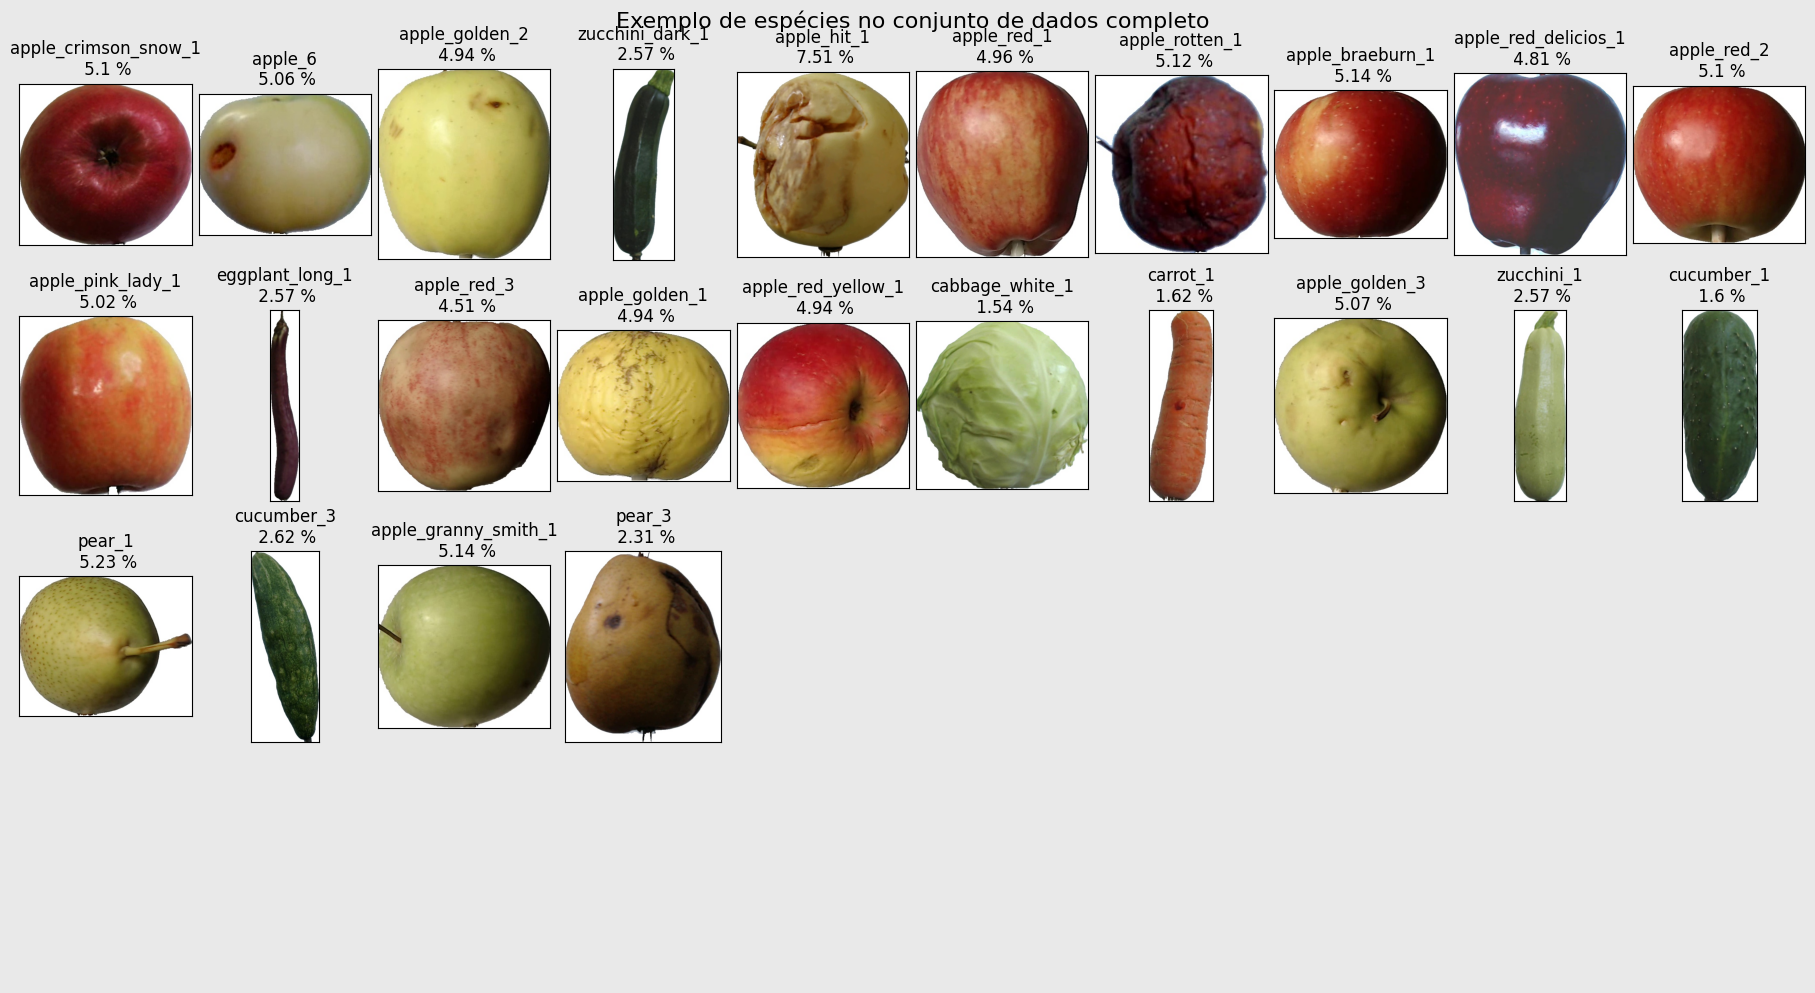

In [ ]:
if df is not None and not df.empty:
    try:
        # Criar um DataFrame com um rótulo único para cada categoria
        df_unique = df.copy().drop_duplicates(subset=["Label"]).reset_index()

        # Exibir algumas imagens do conjunto de dados
        fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(18, 10),
                                 subplot_kw={'xticks': [], 'yticks': []})
        fig.patch.set_facecolor('#E0E0E0')
        fig.patch.set_alpha(0.7)
        plt.suptitle("Exemplo de espécies no conjunto de dados completo", size=16)

        for i, ax in enumerate(axes.flat):
            if i < len(df_unique):  # Garantir que não exceda o número de categorias
                ax.imshow(plt.imread(df_unique.Filepath[i]))
                label = df_unique.Label[i]
                percent = round(percent_dict[label], 2) if label in percent_dict else 0
                ax.set_title(f"{label}\n {percent} %", fontsize=12)
            else:
                ax.axis('off')  # Desativar eixos vazios

        plt.tight_layout(pad=0.5)
        plt.show()

    except Exception as e:
        print(f"Erro ao gerar as imagens: {e}")
else:
    print("Erro: O DataFrame está vazio ou não foi criado corretamente. Não é possível exibir as imagens.")


O código verifica se o DataFrame df é válido e não vazio. Em seguida, tenta criar um novo DataFrame df_unique, eliminando duplicatas na coluna "Label" e reiniciando os índices. Ele gera um grid de subplots para exibir imagens de diferentes espécies do conjunto de dados, utilizando as informações do novo DataFrame. Para cada imagem, exibe o rótulo da espécie e sua porcentagem calculada anteriormente. Se ocorrer algum erro ao gerar as imagens, uma mensagem de erro é impressa. Se o DataFrame estiver vazio, uma mensagem de erro é exibida.

In [ ]:
print("Número de categorias únicas no dataset:", len(df_unique))
print(df_unique)


Número de categorias únicas no dataset: 24
    index                                           Filepath  \
0       0  /root/.cache/kagglehub/datasets/moltean/fruits...   
1       1  /root/.cache/kagglehub/datasets/moltean/fruits...   
2       2  /root/.cache/kagglehub/datasets/moltean/fruits...   
3       3  /root/.cache/kagglehub/datasets/moltean/fruits...   
4       4  /root/.cache/kagglehub/datasets/moltean/fruits...   
5       5  /root/.cache/kagglehub/datasets/moltean/fruits...   
6       6  /root/.cache/kagglehub/datasets/moltean/fruits...   
7       7  /root/.cache/kagglehub/datasets/moltean/fruits...   
8       9  /root/.cache/kagglehub/datasets/moltean/fruits...   
9      10  /root/.cache/kagglehub/datasets/moltean/fruits...   
10     11  /root/.cache/kagglehub/datasets/moltean/fruits...   
11     13  /root/.cache/kagglehub/datasets/moltean/fruits...   
12     15  /root/.cache/kagglehub/datasets/moltean/fruits...   
13     17  /root/.cache/kagglehub/datasets/moltean/fruits... 

O código imprime o número de categorias únicas no DataFrame df_unique e exibe o conteúdo desse DataFrame.

In [ ]:
def get_sample(N, df):
    """
    Extrai uma amostra do DataFrame `df` contendo `N` linhas.
    Se necessário, utiliza substituição para atingir o tamanho desejado.
    """
    if df.empty:
        print("Erro: O DataFrame está vazio. Não é possível extrair uma amostra.")
        return None, 0

    # Obter os rótulos únicos
    total_labels = list(df["Label"].unique())

    # Número total de linhas no DataFrame
    n = df.shape[0]

    # Calcular a fração necessária para atingir `N` linhas
    p = N / n

    # Garantir que a fração esteja dentro do limite [0, 1]
    if p > 1:
        print(f"A fração ({p:.2f}) excede 1, habilitando substituição (replace=True).")
        sample = df.sample(n=N, replace=True)
    else:
        sample = df.sample(frac=p, replace=False)

    print(f"Uma amostra com {N} linhas foi extraída.")
    n_label = sample["Label"].nunique()
    return sample, n_label

# Extrair a amostra
sample, n_labels = get_sample(4000, df)

# Verificar o resultado
if sample is not None:
    print(f"A amostra contém {len(sample)} linhas e {n_labels} rótulos únicos.")


Uma amostra com 4000 linhas foi extraída.
A amostra contém 4000 linhas e 24 rótulos únicos.


O código define a função get_sample, que extrai uma amostra de um DataFrame (df) com N linhas, utilizando substituição se necessário. Primeiro, verifica se o DataFrame está vazio e, em caso afirmativo, imprime uma mensagem de erro. Em seguida, calcula a fração de amostras necessárias para atingir N, garantindo que essa fração não exceda 1. Se a fração for maior que 1, permite a amostragem com substituição; caso contrário, amostra sem substituição. A função retorna a amostra extraída e o número de rótulos únicos presentes nela. Após a chamada da função, verifica-se se a amostra foi gerada corretamente e exibe seu tamanho e número de rótulos únicos.

In [ ]:
# Criar um dicionário contendo a porcentagem de cada rótulo na amostra
def calculate_percentage_distribution(sample):
    """
    Calcula a porcentagem de ocorrência de cada rótulo no DataFrame fornecido.
    """
    if sample is None or sample.empty:
        print("Erro: A amostra está vazia ou não foi gerada.")
        return {}

    percent_dict = {}
    total_rows = sample.shape[0]

    for label in sample["Label"].unique():
        # Filtrar as linhas correspondentes ao rótulo atual
        rows_with_label = sample[sample["Label"] == label]
        count = rows_with_label.shape[0]

        # Calcular a porcentagem
        percentage = (count / total_rows) * 100
        percent_dict[label] = percentage

    print("Distribuição de porcentagens calculada com sucesso.")
    return percent_dict

# Calcular a distribuição de porcentagens
percent_dict = calculate_percentage_distribution(sample)

# Verificar o resultado
if percent_dict:
    for label, percentage in percent_dict.items():
        print(f"Rótulo: {label}, Porcentagem: {percentage:.2f}%")


Distribuição de porcentagens calculada com sucesso.
Rótulo: apple_red_2, Porcentagem: 5.17%
Rótulo: cabbage_white_1, Porcentagem: 1.32%
Rótulo: apple_granny_smith_1, Porcentagem: 5.25%
Rótulo: zucchini_dark_1, Porcentagem: 2.70%
Rótulo: apple_rotten_1, Porcentagem: 5.50%
Rótulo: apple_golden_2, Porcentagem: 5.00%
Rótulo: apple_hit_1, Porcentagem: 7.42%
Rótulo: apple_golden_1, Porcentagem: 4.88%
Rótulo: cucumber_3, Porcentagem: 2.70%
Rótulo: cucumber_1, Porcentagem: 1.75%
Rótulo: apple_pink_lady_1, Porcentagem: 4.65%
Rótulo: apple_6, Porcentagem: 5.38%
Rótulo: apple_red_yellow_1, Porcentagem: 4.88%
Rótulo: pear_3, Porcentagem: 2.48%
Rótulo: eggplant_long_1, Porcentagem: 2.48%
Rótulo: zucchini_1, Porcentagem: 2.57%
Rótulo: apple_red_1, Porcentagem: 5.05%
Rótulo: apple_red_3, Porcentagem: 4.52%
Rótulo: carrot_1, Porcentagem: 1.55%
Rótulo: apple_braeburn_1, Porcentagem: 4.95%
Rótulo: apple_crimson_snow_1, Porcentagem: 4.92%
Rótulo: apple_golden_3, Porcentagem: 4.75%
Rótulo: apple_red_delic

O código define a função calculate_percentage_distribution, que calcula a porcentagem de ocorrência de cada rótulo em uma amostra fornecida. Primeiro, verifica se a amostra está vazia e, se estiver, imprime uma mensagem de erro. Em seguida, itera sobre os rótulos únicos da amostra, contando quantas vezes cada rótulo aparece e calculando sua porcentagem em relação ao total de linhas da amostra. Por fim, armazena os resultados em um dicionário e os imprime, mostrando a distribuição de porcentagens para cada rótulo.

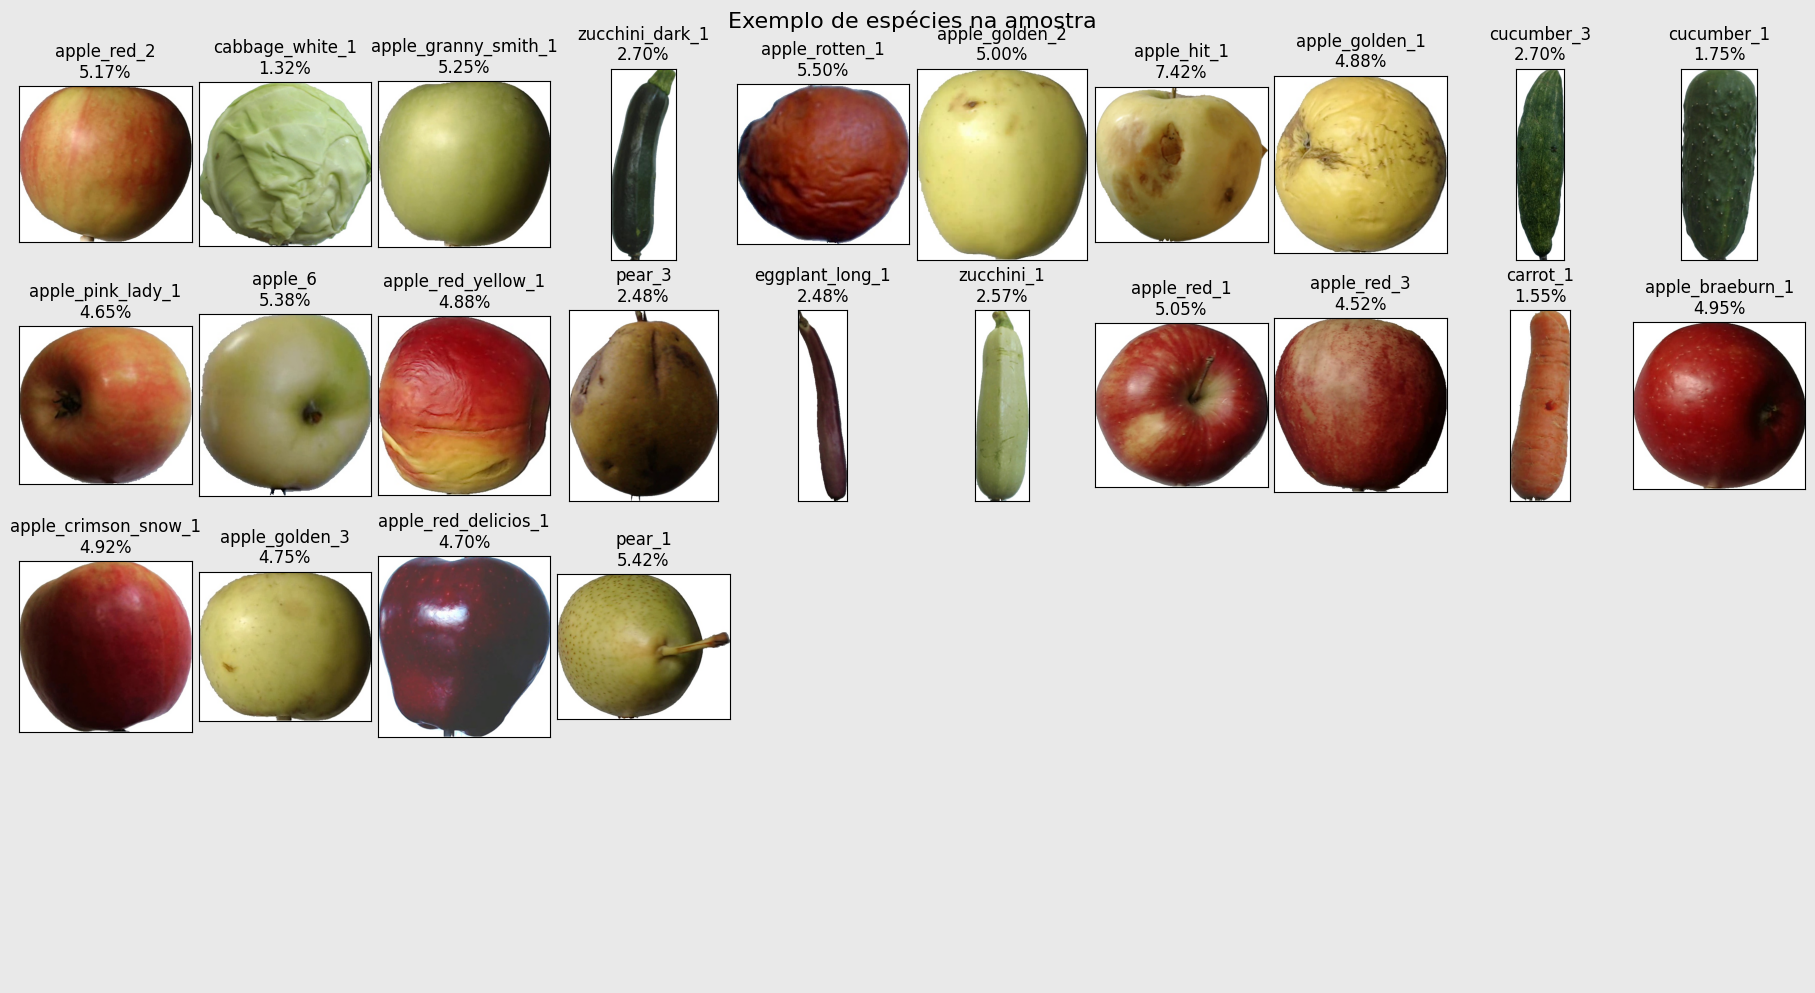

In [ ]:
# Criar um DataFrame com um exemplo único de cada categoria na amostra
def display_sample_images(sample, percent_dict):
    """
    Exibe imagens de exemplo do conjunto de amostras.
    """
    if sample is None or sample.empty:
        print("Erro: A amostra está vazia ou não foi gerada.")
        return

    if not percent_dict:
        print("Erro: O dicionário de porcentagens está vazio.")
        return

    # Criar um DataFrame com rótulos únicos
    df_unique = sample.drop_duplicates(subset=["Label"]).reset_index()

    # Determinar o número de rótulos únicos
    num_labels = df_unique.shape[0]

    # Configuração de grade de imagens
    nrows = 4
    ncols = min(10, num_labels)  # Ajustar para o número de rótulos disponíveis
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10),
                             subplot_kw={'xticks': [], 'yticks': []})
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.suptitle("Exemplo de espécies na amostra", size=16)

    # Exibir imagens
    axes = axes.flatten()
    for i, ax in enumerate(axes[:num_labels]):
        filepath = df_unique.Filepath.iloc[i]
        label = df_unique.Label.iloc[i]
        percentage = percent_dict.get(label, 0)

        # Tentar carregar e exibir a imagem
        try:
            ax.imshow(plt.imread(filepath))
            ax.set_title(f"{label}\n{percentage:.2f}%", fontsize=12)
        except Exception as e:
            print(f"Erro ao carregar a imagem em {filepath}: {e}")
            ax.set_visible(False)

    # Ocultar eixos extras
    for ax in axes[num_labels:]:
        ax.axis("off")

    plt.tight_layout(pad=0.5)
    plt.show()

# Exibir imagens de exemplo
display_sample_images(sample, percent_dict)


O código define a função display_sample_images, que exibe imagens representativas de cada categoria em uma amostra. Primeiro, verifica se a amostra e o dicionário de porcentagens não estão vazios. Em seguida, cria um DataFrame com rótulos únicos da amostra e configura uma grade para exibir as imagens. Ele utiliza o Matplotlib para gerar um subplot de imagens, onde cada imagem corresponde a um rótulo único, mostrando também a porcentagem de ocorrência desse rótulo. Caso ocorra um erro ao carregar uma imagem, a função imprime uma mensagem de erro e oculta o eixo correspondente. Por fim, as imagens são apresentadas em uma janela gráfica.

In [ ]:
# Importar bibliotecas do TensorFlow e componentes necessários para o modelo ResNet50
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import img_to_array

# Carregar o modelo ResNet50 pré-treinado no conjunto de dados ImageNet
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Exibir um resumo do modelo para confirmar a configuração
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 106, 106, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 50, 50, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 50, 50, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 50, 50, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 52, 52, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 25, 25, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 25, 25, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 25, 25, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 25, 25, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 25, 25, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 25, 25, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 25, 25, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

O código importa as bibliotecas necessárias do TensorFlow para usar o modelo ResNet50, uma arquitetura de rede neural profunda comumente utilizada em tarefas de classificação de imagens. Em seguida, ele carrega a versão pré-treinada do ResNet50, utilizando pesos obtidos do conjunto de dados ImageNet, e especifica que a camada de saída superior deve ser excluída (include_top=False), permitindo que a rede seja utilizada como um extrator de recursos em vez de um classificador final. O modelo é configurado para aceitar imagens de entrada com a forma (100, 100, 3), que representa imagens RGB de 100x100 pixels. Por fim, o código exibe um resumo da arquitetura do modelo, mostrando suas camadas e parâmetros, confirmando assim que a configuração foi realizada corretamente.

## Main Code - Image preprocessing and features extraction with Resnet50:
---



In [ ]:
import pandas as pd
from PIL import Image, ImageOps
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications import ResNet50

# Função para pré-processamento de imagens
def preprocess(path):
    """
    Aplica passos de pré-processamento na imagem especificada pelo caminho.
    """
    # Carregar a imagem usando OpenCV
    img = cv2.imread(path)

    # Redimensionar a imagem para o formato desejado (224x224)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)

    # Aplicar filtro de redução de ruído
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    # Ajustar contraste e equalizar a imagem
    img = ImageOps.equalize(ImageOps.autocontrast(Image.fromarray(img), cutoff=5))

    # Converter a imagem para um array numpy
    img = img_to_array(img)

    # Aplicar desfoque gaussiano
    blur_val = (5, 5)
    img = cv2.GaussianBlur(img, blur_val, 0)

    # Pré-processar a imagem para o modelo ResNet50
    img = preprocess_input(img)
    return img

# Carregar o modelo ResNet50 com pesos pré-treinados e pooling global
model = ResNet50(weights='imagenet', include_top=False, pooling="avg")

# Função para extrair features da imagem usando ResNet50
def preprocess2(img):
    """
    Extrai os recursos (features) da imagem usando ResNet50.
    """
    # Converter a imagem para um array
    x = img_to_array(img)

    # Expandir as dimensões do array para corresponder ao formato esperado pelo modelo
    x = np.expand_dims(x, axis=0)

    # Extrair as features usando o modelo ResNet50
    features = model.predict(x)

    # Achatar os recursos e retornar como uma lista
    output = [p.flatten() for p in features]
    return list(output[0])


O código importa bibliotecas necessárias para manipulação de imagens e aprendizado de máquina, e define funções para pré-processar imagens e extrair características usando o modelo ResNet50. A função preprocess carrega uma imagem, redimensiona-a para 224x224 pixels, aplica redução de ruído, ajusta o contraste e equaliza a imagem, além de convertê-la em um array NumPy e aplicar desfoque gaussiano, preparando-a para o modelo. Em seguida, o modelo ResNet50 é carregado com pesos pré-treinados. A função preprocess2 recebe uma imagem, converte-a em um array, expande suas dimensões para adequá-la ao formato esperado pelo modelo e extrai as características, retornando-as como uma lista. Dessa forma, o código facilita a preparação e análise de imagens em tarefas de classificação ou reconhecimento.

In [ ]:
# Ler a imagem usando o caminho do arquivo
img = cv2.imread(sample["Filepath"].values[0])

# Converter a imagem de BGR para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem para o formato esperado
img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)

# Aplicar redução de ruído
img_denoised = cv2.fastNlMeansDenoisingColored(img_resized, None, 10, 10, 7, 21)

# Ajustar o contraste e equalizar a imagem
img_equalized = np.array(
    ImageOps.equalize(
        ImageOps.autocontrast(Image.fromarray(img_denoised), cutoff=5)
    )
)

# Aplicar desfoque gaussiano
blur_val = (5, 5)
img_blurred = cv2.GaussianBlur(img_equalized, blur_val, 0)

# Converter a imagem para um array NumPy
arr = img_to_array(img_blurred)

# Pré-processar o array para o modelo
arr_preprocessed = preprocess_input(arr)


O código realiza várias etapas de pré-processamento em uma imagem, começando pela leitura da imagem a partir de um caminho de arquivo. Ele converte a imagem do formato BGR para RGB, redimensiona-a para 224x224 pixels e aplica redução de ruído. Em seguida, ajusta o contraste e equaliza a imagem, utilizando operações de ajuste automático. Após isso, um desfoque gaussiano é aplicado para suavizar a imagem. Por fim, a imagem processada é convertida em um array NumPy, que é pré-processado para ser compatível com o modelo de aprendizado de máquina, preparando-a para análise ou classificação.

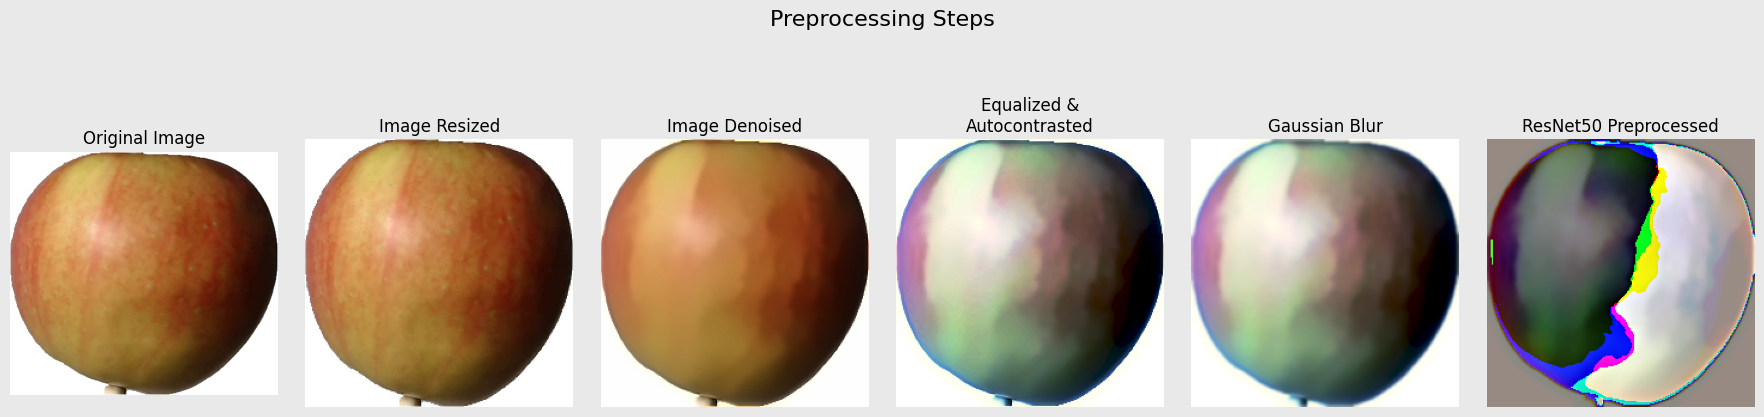

In [ ]:
# Criar uma figura para exibir as etapas de pré-processamento
fig = plt.figure(figsize=[18, 5])
fig.patch.set_facecolor('#E0E0E0')  # Definir a cor de fundo
fig.patch.set_alpha(0.7)  # Ajustar a transparência
plt.suptitle("Preprocessing Steps", size=16)

# Etapa 1: Imagem original
plt.subplot(1, 6, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')  # Remover os eixos

# Etapa 2: Imagem redimensionada
plt.subplot(1, 6, 2)
plt.title("Image Resized")
plt.imshow(img_resized)
plt.axis('off')

# Etapa 3: Imagem com redução de ruído
plt.subplot(1, 6, 3)
plt.title("Image Denoised")
plt.imshow(img_denoised)
plt.axis('off')

# Etapa 4: Imagem equalizada e com contraste ajustado
plt.subplot(1, 6, 4)
plt.title("Equalized &\nAutocontrasted")
plt.imshow(img_equalized)
plt.axis('off')

# Etapa 5: Imagem com desfoque Gaussiano
plt.subplot(1, 6, 5)
plt.title("Gaussian Blur")
plt.imshow(img_blurred)
plt.axis('off')

# Etapa 6: Pré-processamento da ResNet50
plt.subplot(1, 6, 6)
plt.title("ResNet50 Preprocessed")
plt.imshow(arr_preprocessed.astype('uint8'))  # Converter para exibição
plt.axis('off')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(pad=2)
plt.show()


O código cria uma figura para visualizar as etapas de pré-processamento de uma imagem, organizando as etapas em uma única linha de seis subplots. Cada subplot exibe uma versão da imagem em diferentes estágios de processamento: a imagem original, a imagem redimensionada, a imagem com redução de ruído, a imagem equalizada com contraste ajustado, a imagem com desfoque gaussiano e, finalmente, a imagem pré-processada para o modelo ResNet50. As legendas dos subplots são definidas para identificar cada etapa, e os eixos são removidos para uma apresentação mais limpa. O fundo da figura é definido com uma cor cinza claro e uma leve transparência, e o layout é ajustado para evitar sobreposição entre as imagens antes de ser exibido.

In [ ]:
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

def preprocess_image(filepath):
    """Função auxiliar para pré-processar uma única imagem"""
    return preprocess(filepath)

# Verifique o número de imagens para o teste
print(f"Número total de imagens: {len(sample['Filepath'])}")

# Processar imagens em paralelo
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(max_workers=4) as executor:  # Ajuste o número de threads
    sample["Preprocessed Images"] = list(executor.map(preprocess_image, sample["Filepath"]))


# Aplicar a extração de características nas imagens pré-processadas
sample["Features"] = sample["Preprocessed Images"].apply(preprocess2)

# Exibir a forma do DataFrame resultante
print(sample.shape)


Número total de imagens: 4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/ste

O código utiliza a biblioteca concurrent.futures para pré-processar imagens em paralelo, aumentando a eficiência do processamento. Ele define uma função auxiliar para pré-processar cada imagem individualmente e, em seguida, aplica essa função a todos os caminhos de arquivo no DataFrame sample utilizando um executor de thread com um número máximo de quatro threads. Após o pré-processamento, a extração de características das imagens resultantes é aplicada, armazenando os resultados em uma nova coluna no DataFrame. Por fim, a forma do DataFrame resultante é exibida.

## Main Code - Dimensional reduction with PCA:
---

In [ ]:
# Extrair características e criar novas colunas no DataFrame para cada característica
for i in range(len(sample["Features"].values[0])):
    def format_features(val):
        return val[i]  # Acessar o valor da característica na posição i

    sample["feature{}".format(i + 1)] = sample["Features"].apply(format_features)


O código extrai características de imagens armazenadas na coluna "Features" do DataFrame e cria novas colunas nomeadas como "feature1", "feature2", etc., onde cada coluna contém uma característica específica extraída de cada imagem. Ele utiliza uma função auxiliar para acessar o valor da característica na posição correspondente de cada lista de características.

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecionar apenas as colunas de características
features = sample.drop(columns=['Filepath', 'Label', 'Preprocessed Images', 'Features'], errors='ignore')

# Verificar os tipos de dados
print(features.dtypes)

# Filtrar apenas colunas numéricas
features_numeric = features.select_dtypes(include=[np.number])

# Escalonar os dados
scaler = StandardScaler()
Xs = scaler.fit_transform(features_numeric)

# Aplicar PCA
pca = PCA(n_components=min(features_numeric.shape[1], features_numeric.shape[0])).fit(Xs)
nbr_pca = 0
scree = pca.explained_variance_ratio_

# Encontrar o número de componentes principais que explicam pelo menos 80% da variância
for i in range(features_numeric.shape[1]):
    a = scree.cumsum()[i]
    if a >= 0.8:
        print("{} principal components explain 80% of the total variance".format(i + 1))
        print("Sum of variance explained: {}%".format(round(a * 100, 2)))
        nbr_pca = i + 1  # Adicionar 1 pois o índice começa em 0
        break

# Aplicar PCA com o número de componentes selecionado
pca = PCA(n_components=nbr_pca)
Xs_pca = pca.fit_transform(Xs)  # Transformar os dados

# Exibir as componentes principais
print("Shape of the PCA transformed data:", Xs_pca.shape)


O código realiza a análise de componentes principais (PCA) em um conjunto de dados de características extraídas de imagens. Primeiro, ele seleciona as colunas numéricas do DataFrame, escalonando os dados para normalizar as variáveis. Em seguida, o PCA é aplicado para identificar componentes principais, e um loop determina quantos componentes são necessários para explicar pelo menos 80% da variância total. Após encontrar esse número, o PCA é novamente aplicado, transformando os dados originais nas novas componentes principais. Por fim, o código exibe a forma dos dados transformados, que agora estão em um espaço de menor dimensão.

In [ ]:
# Aplicar a transformação PCA aos dados escalonados
d = pca.fit_transform(Xs)

# Criar um DataFrame com os componentes principais
d = pd.DataFrame(d, columns=["PCA n°{}".format(i + 1) for i in range(nbr_pca)])

# Adicionar a coluna de rótulos ao DataFrame
d["Label"] = sample["Label"].values

# Exibir as primeiras linhas do DataFrame resultante
d.head()


O código aplica a transformação PCA aos dados escalonados, criando um novo DataFrame que contém os componentes principais nomeados, além de adicionar uma coluna de rótulos correspondente às classes das imagens originais. Em seguida, ele exibe as primeiras linhas desse DataFrame resultante.

## Main Code - Classification:
---

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def lets_try(train, y):
    results = {}
    ss = StandardScaler()
    scaled_train = ss.fit_transform(train)

    def test_model(clf, use_scaling=False):
        """Testa um classificador usando validação cruzada."""
        cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
        if use_scaling:
            scores = cross_val_score(clf, scaled_train, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        else:
            scores = cross_val_score(clf, train, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        return scores

    # Lista de classificadores a serem testados
    classifiers = {
        "SVC (Linear)": SVC(kernel="linear"),
        "Logistic Regression": LogisticRegression(),
        "KNeighbors": KNeighborsClassifier(),
        "SVC (Polynomial)": SVC(kernel="poly"),
        "Random Forest Classifier": RandomForestClassifier(),
        "SVC (RBF)": SVC(kernel='rbf')
    }

    # Testar cada classificador
    for name, clf in classifiers.items():
        use_scaling = name in ["SVC (Linear)", "Logistic Regression", "SVC (Polynomial)", "SVC (RBF)"]
        results[name] = test_model(clf, use_scaling)
        print(f"{name} done.")

    return results


Esse código realiza a avaliação de diferentes classificadores de machine learning em um conjunto de dados de treinamento. Primeiramente, ele escala os dados usando o StandardScaler para melhorar o desempenho dos modelos que requerem dados normalizados. Em seguida, define uma função test_model que aplica a validação cruzada estratificada repetida para cada classificador, calculando a precisão. A função lets_try armazena os resultados em um dicionário para vários classificadores, como SVM, regressão logística, KNN, floresta aleatória e SVC com diferentes núcleos. O código então itera sobre esses classificadores, chamando test_model para cada um e imprimindo uma mensagem de conclusão. Por fim, os resultados de precisão são retornados, permitindo a comparação do desempenho dos diferentes modelos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as variáveis de entrada (X) e saída (y)
y = d["Label"]
X = d.drop(columns=["Label"])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta o escalonador e transforma os dados de treinamento
X_test_scaled = scaler.transform(X_test)        # Transforma os dados de teste com o mesmo escalonador

# Exibir as formas dos conjuntos de dados
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)


Esse código separa as variáveis de entrada (X) e saída (y) de um DataFrame, onde "Label" é a variável de saída. Em seguida, utiliza a função train_test_split para dividir os dados em conjuntos de treinamento e teste, reservando 33% dos dados para teste. Depois, aplica o StandardScaler para normalizar os dados, ajustando o escalonador aos dados de treinamento e transformando tanto o conjunto de treinamento quanto o de teste. Por fim, imprime as dimensões dos conjuntos de dados escalonados para verificar o tamanho dos dados.

In [ ]:
# Chamar a função lets_try com os dados de treinamento escalonados
dic_results = lets_try(X_train_scaled, y_train)

# Exibir os resultados
for model, scores in dic_results.items():
    print(f"{model}: Mean Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


Esse código chama a função lets_try com os dados de treinamento escalonados e os rótulos correspondentes, armazenando os resultados da precisão média dos classificadores em um dicionário. Em seguida, ele exibe a precisão média e o desvio padrão para cada modelo testado, formatando a saída para facilitar a leitura.

In [ ]:
import matplotlib.pyplot as plt

# Criar a figura e definir suas propriedades
fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)

# Título do gráfico
plt.title("Distribuição das Pontuações de Validação Cruzada no Conjunto de Treinamento \n (3 Folds)", size=16)

# Criar o boxplot com as pontuações dos resultados
plt.boxplot(dic_results.values(), labels=dic_results.keys(), showmeans=True)

# Configurar o rótulo do eixo Y
plt.ylabel("Pontuações de CV \n (Acurácia)", size=14)

# Definir os limites do eixo Y
plt.ylim(0, 1)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)

# Adicionar uma grade ao gráfico
plt.grid()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()


Esse código cria um boxplot para visualizar a distribuição das pontuações de validação cruzada (CV) dos modelos testados durante a validação. Primeiro, ele configura a figura e o título, define a cor de fundo e ajusta o tamanho. Em seguida, o boxplot é gerado com as pontuações dos modelos, mostrando também as médias. O eixo Y é rotulado e definido para ter um intervalo entre 0 e 1, enquanto os rótulos do eixo X são rotacionados para melhor legibilidade. Por fim, uma grade é adicionada, o layout é ajustado para evitar sobreposições, e o gráfico é exibido.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Inicializar o classificador SVC com kernel linear
clf = SVC(kernel='linear')

# Inicializar o escalador
ss = StandardScaler()

# Escalonar os dados de treinamento e teste
scaled_train = ss.fit_transform(X_train)  # Ajusta e transforma o conjunto de treinamento
scaled_test = ss.transform(X_test)  # Apenas transforma o conjunto de teste

# Treinar o modelo
clf.fit(scaled_train, y_train)

# Fazer previsões no conjunto de teste
pred = clf.predict(scaled_test)

# Calcular a acurácia
score = accuracy_score(y_test, pred)

# Exibir o resultado
print(f"Acurácia do modelo SVC (kernel linear): {score:.4f}")


Esse código utiliza o classificador SVC (Support Vector Classification) com um kernel linear para treinar um modelo de aprendizado de máquina. Primeiro, ele inicializa o classificador e um escalador para normalizar os dados. Os dados de treinamento são escalonados usando fit_transform, enquanto os dados de teste são escalonados apenas com transform. Em seguida, o modelo é treinado com os dados escalonados de treinamento. Após o treinamento, previsões são feitas sobre os dados de teste. Por fim, a acurácia do modelo é calculada e exibida, indicando o desempenho do classificador no conjunto de teste.

In [ ]:
print(f"Acurácia do modelo de Regressão Logística: {score:.3f} no conjunto de teste.")


Essa linha imprime a acurácia do modelo de Regressão Logística, formatando o valor da acurácia com três casas decimais, e indica que o resultado se refere ao conjunto de teste.

In [ ]:
dic_fail = {r: p for r, p in zip(y_test, pred) if r != p}


Esse código cria um dicionário chamado dic_fail, onde as chaves são as verdadeiras classes (y_test) e os valores são as previsões (pred) apenas para as instâncias em que a previsão falhou (ou seja, quando a classe verdadeira não é igual à previsão).

In [ ]:
import cv2

def get_path(true_val, pred):
    # Obter o caminho da imagem verdadeira
    path_true = df.loc[df["Label"] == true_val, "Filepath"].values[0]
    img_true = cv2.imread(path_true)
    img_true = cv2.cvtColor(img_true, cv2.COLOR_BGR2RGB)

    # Obter o caminho da imagem prevista
    path_pred = df.loc[df["Label"] == pred, "Filepath"].values[0]
    img_pred = cv2.imread(path_pred)
    img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)

    return img_true, img_pred


Esse código define uma função chamada get_path que, dado um valor verdadeiro (true_val) e uma previsão (pred), obtém os caminhos das imagens correspondentes a essas classes a partir de um DataFrame (df). Ele lê as imagens usando a biblioteca OpenCV (cv2), converte suas cores de BGR para RGB e retorna as duas imagens como arrays. A função é útil para comparar visualmente as imagens reais e as previstas em uma tarefa de classificação.

In [ ]:
for true_label, predicted_label in dic_fail.items():
    display_pred(true_label, predicted_label)


Esse código itera sobre o dicionário dic_fail, que contém pares de rótulos verdadeiros e previstos para as previsões que falharam, e chama a função display_pred para cada par, exibindo visualmente as imagens correspondentes às classificações incorretas. Assim, permite a análise das falhas na classificação, facilitando a identificação de padrões ou erros nos resultados do modelo.

In [ ]:
import matplotlib.pyplot as plt
import cv2

def get_path(true_val, pred):
    # Obter o caminho da imagem verdadeira
    path_true = df.loc[df["Label"] == true_val, "Filepath"].values[0]
    img_true = cv2.imread(path_true)
    img_true = cv2.cvtColor(img_true, cv2.COLOR_BGR2RGB)

    # Obter o caminho da imagem prevista
    path_pred = df.loc[df["Label"] == pred, "Filepath"].values[0]
    img_pred = cv2.imread(path_pred)
    img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)

    return img_true, img_pred

def display_pred(true_label, predicted_label):
    img_true, img_pred = get_path(true_label, predicted_label)

    plt.figure(figsize=(10, 5))

    # Imagem verdadeira
    plt.subplot(1, 2, 1)
    plt.imshow(img_true)
    plt.title(f"Imagem Verdadeira: {true_label}")  # Exibir valor verdadeiro
    plt.axis('off')

    # Imagem prevista
    plt.subplot(1, 2, 2)
    plt.imshow(img_pred)
    plt.title(f"Imagem Prevista: {predicted_label}")  # Exibir valor previsto
    plt.axis('off')

    plt.show()

# Exibir as previsões incorretas
for true_label, predicted_label in dic_fail.items():
    display_pred(true_label, predicted_label)